In [60]:
import pandas as pd
from isc301.config import maisons_raw_path
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Lab house pricing

In [61]:
df = pd.read_csv(maisons_raw_path)
df.head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
0,1710,7,856,5,2,1,0,8,1,3,2008,208500,2 pans,individuelle,bonne,451.271415
1,1262,6,1262,8,2,0,1,6,1,3,2007,181500,2 pans,individuelle,moyenne,0.000000
2,1786,7,920,5,2,1,1,6,1,3,2008,223500,2 pans,individuelle,bonne,466.368854
3,1717,7,756,5,3,0,1,7,1,3,2006,140000,2 pans,individuelle,bonne,152.302986
4,2198,8,1145,5,3,1,1,9,1,4,2008,250000,2 pans,individuelle,bonne,378.184663


## Data studies and visualization

<Axes: xlabel='surf_hab', ylabel='prix'>

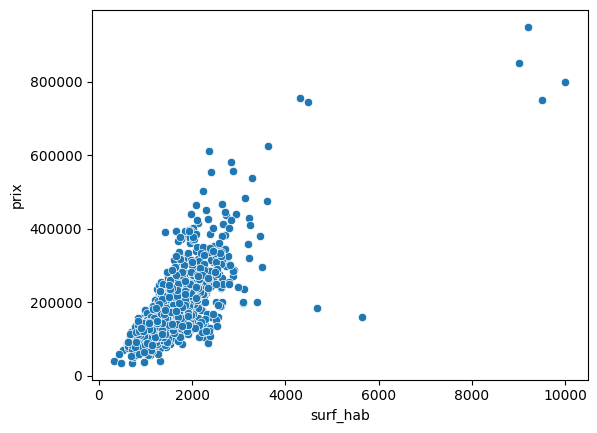

In [80]:
# plot surf_hab vs prix with sns
sns.scatterplot(data=df, x="surf_hab", y="prix")

<Axes: xlabel='prix', ylabel='Count'>

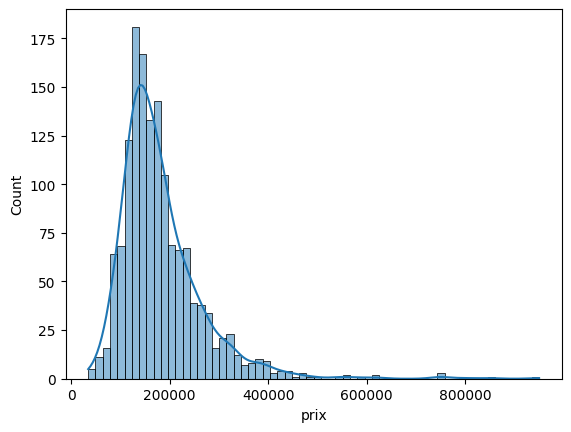

In [62]:
# plot the distribution of the target variable 'price'
sns.histplot(df['prix'], kde=True)

In [63]:
qualite_map = {"mediocre": 1, "moyenne": 2, "bonne": 3, "excellente": 4}
df["qualite_cuisine"] = df["qualite_cuisine"].map(qualite_map)

<Axes: >

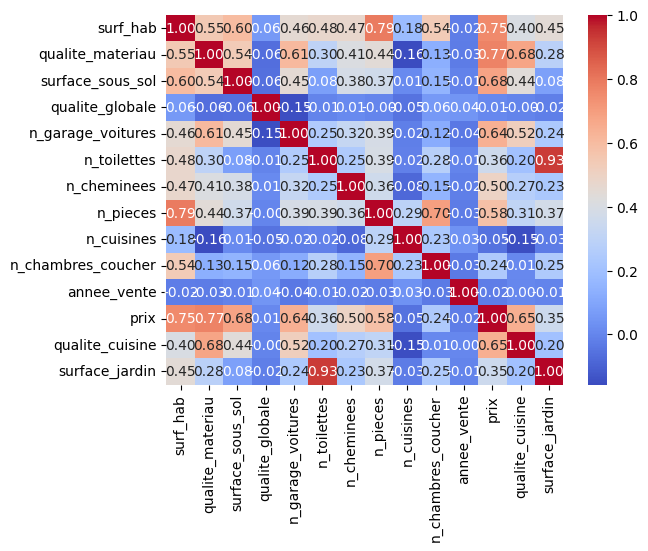

In [64]:
# plot correlation matrix for numeric columns (remove non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

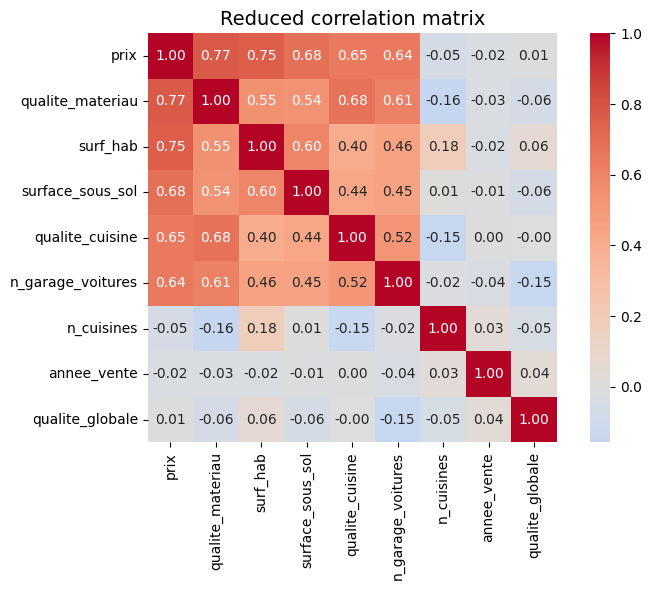

In [65]:
# --- Paramètres ---
target = "prix"     # variable cible
k_top = 5           # combien de variables fortement corrélées garder
k_bottom = 3        # combien de variables faiblement corrélées garder

# 1) Ne garder que les colonnes numériques
num_df = df.select_dtypes(include="number").copy()

# 2) Corrélations (entre numériques)
corr_full = num_df.corr()

# 3) Corrélation de chaque feature avec la cible (hors cible elle-même)
target_corr = corr_full[target].drop(labels=[target]).dropna()

# 4) Sélection : top-k (|corr| élevé) et bottom-k (|corr| faible)
order = target_corr.abs().sort_values(ascending=False)
top_feats = order.head(k_top).index.tolist()
bottom_feats = order.tail(k_bottom).index.tolist()

# 5) Sous-ensemble final (on place la cible en premier)
selected_cols = [target] + top_feats + bottom_feats

# 6) Matrice de corrélations réduite
corr_reduced = num_df[selected_cols].corr()

# Heatmap de la matrice de corrélation réduite
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_reduced,
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    cbar=True, square=True
)
plt.title("Reduced correlation matrix", fontsize=14)
plt.tight_layout()
plt.show()

<Axes: xlabel='qualite_globale', ylabel='prix'>

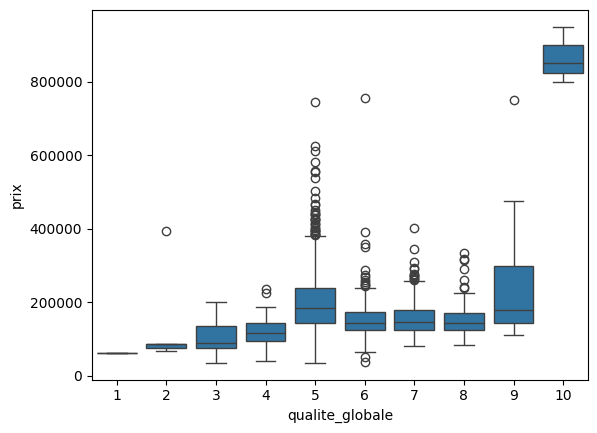

In [66]:
# plot qualite_globale vs prix
sns.boxplot(x='qualite_globale', y='prix', data=df)

<Axes: >

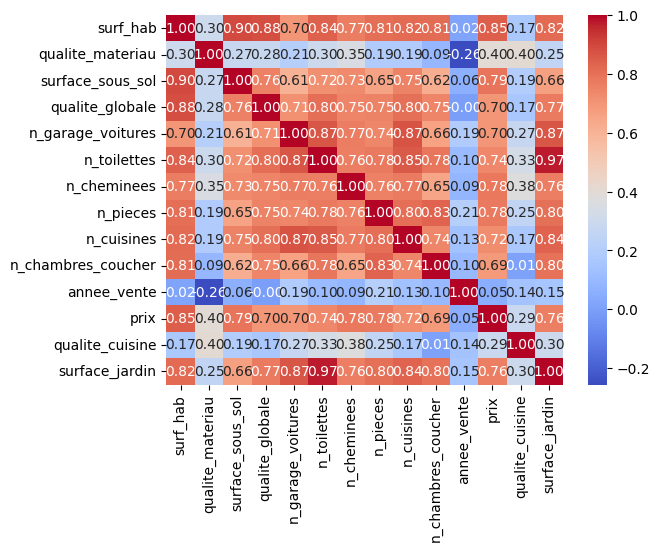

In [67]:
# matrice de corrélation avec la variable cible 'prix' et prix > 400k
high_price_df = df[df['prix'] > 400000]
high_price_numeric_df = high_price_df.select_dtypes(include=['number'])
high_price_correlation_matrix = high_price_numeric_df.corr()
sns.heatmap(high_price_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [68]:
low_price_df = df[df['prix'] <= 400000]

<Axes: xlabel='n_garage_voitures', ylabel='Percent'>

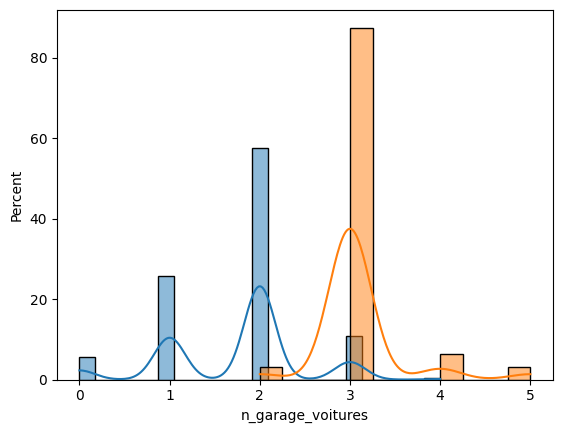

In [69]:
study_var = 'n_garage_voitures'

sns.histplot(low_price_df[study_var], kde=True, stat='percent')
sns.histplot(high_price_df[study_var], kde=True, stat='percent')

<Axes: xlabel='qualite_cuisine', ylabel='Percent'>

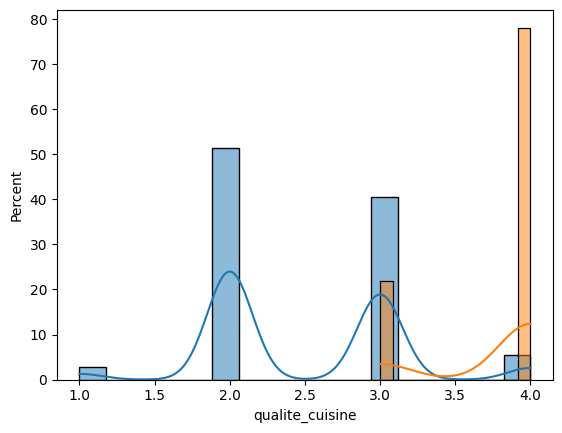

In [70]:
study_var = 'qualite_cuisine'

sns.histplot(low_price_df[study_var], kde=True, stat='percent')
sns.histplot(high_price_df[study_var], kde=True, stat='percent')

<Axes: xlabel='qualite_materiau', ylabel='Percent'>

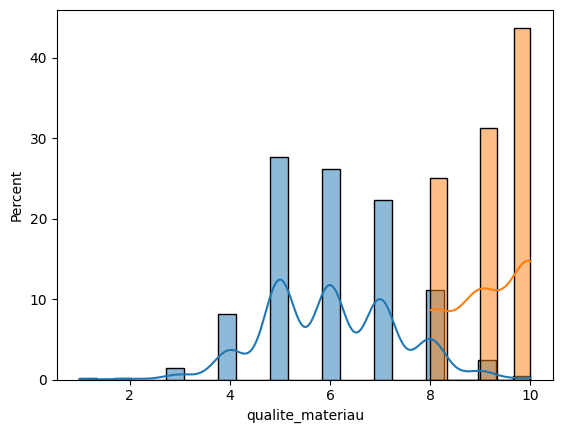

In [71]:
study_var = 'qualite_materiau'

sns.histplot(low_price_df[study_var], kde=True, stat='percent')
sns.histplot(high_price_df[study_var], kde=True, stat='percent')

<Axes: xlabel='qualite_globale', ylabel='prix'>

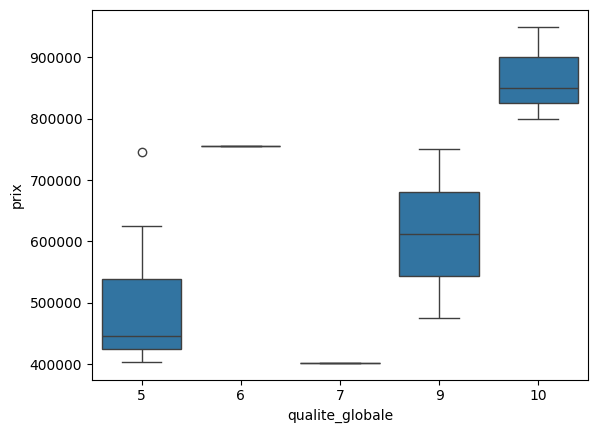

In [72]:
# plot qualite_globale vs prix
sns.boxplot(x='qualite_globale', y='prix', data=high_price_df)

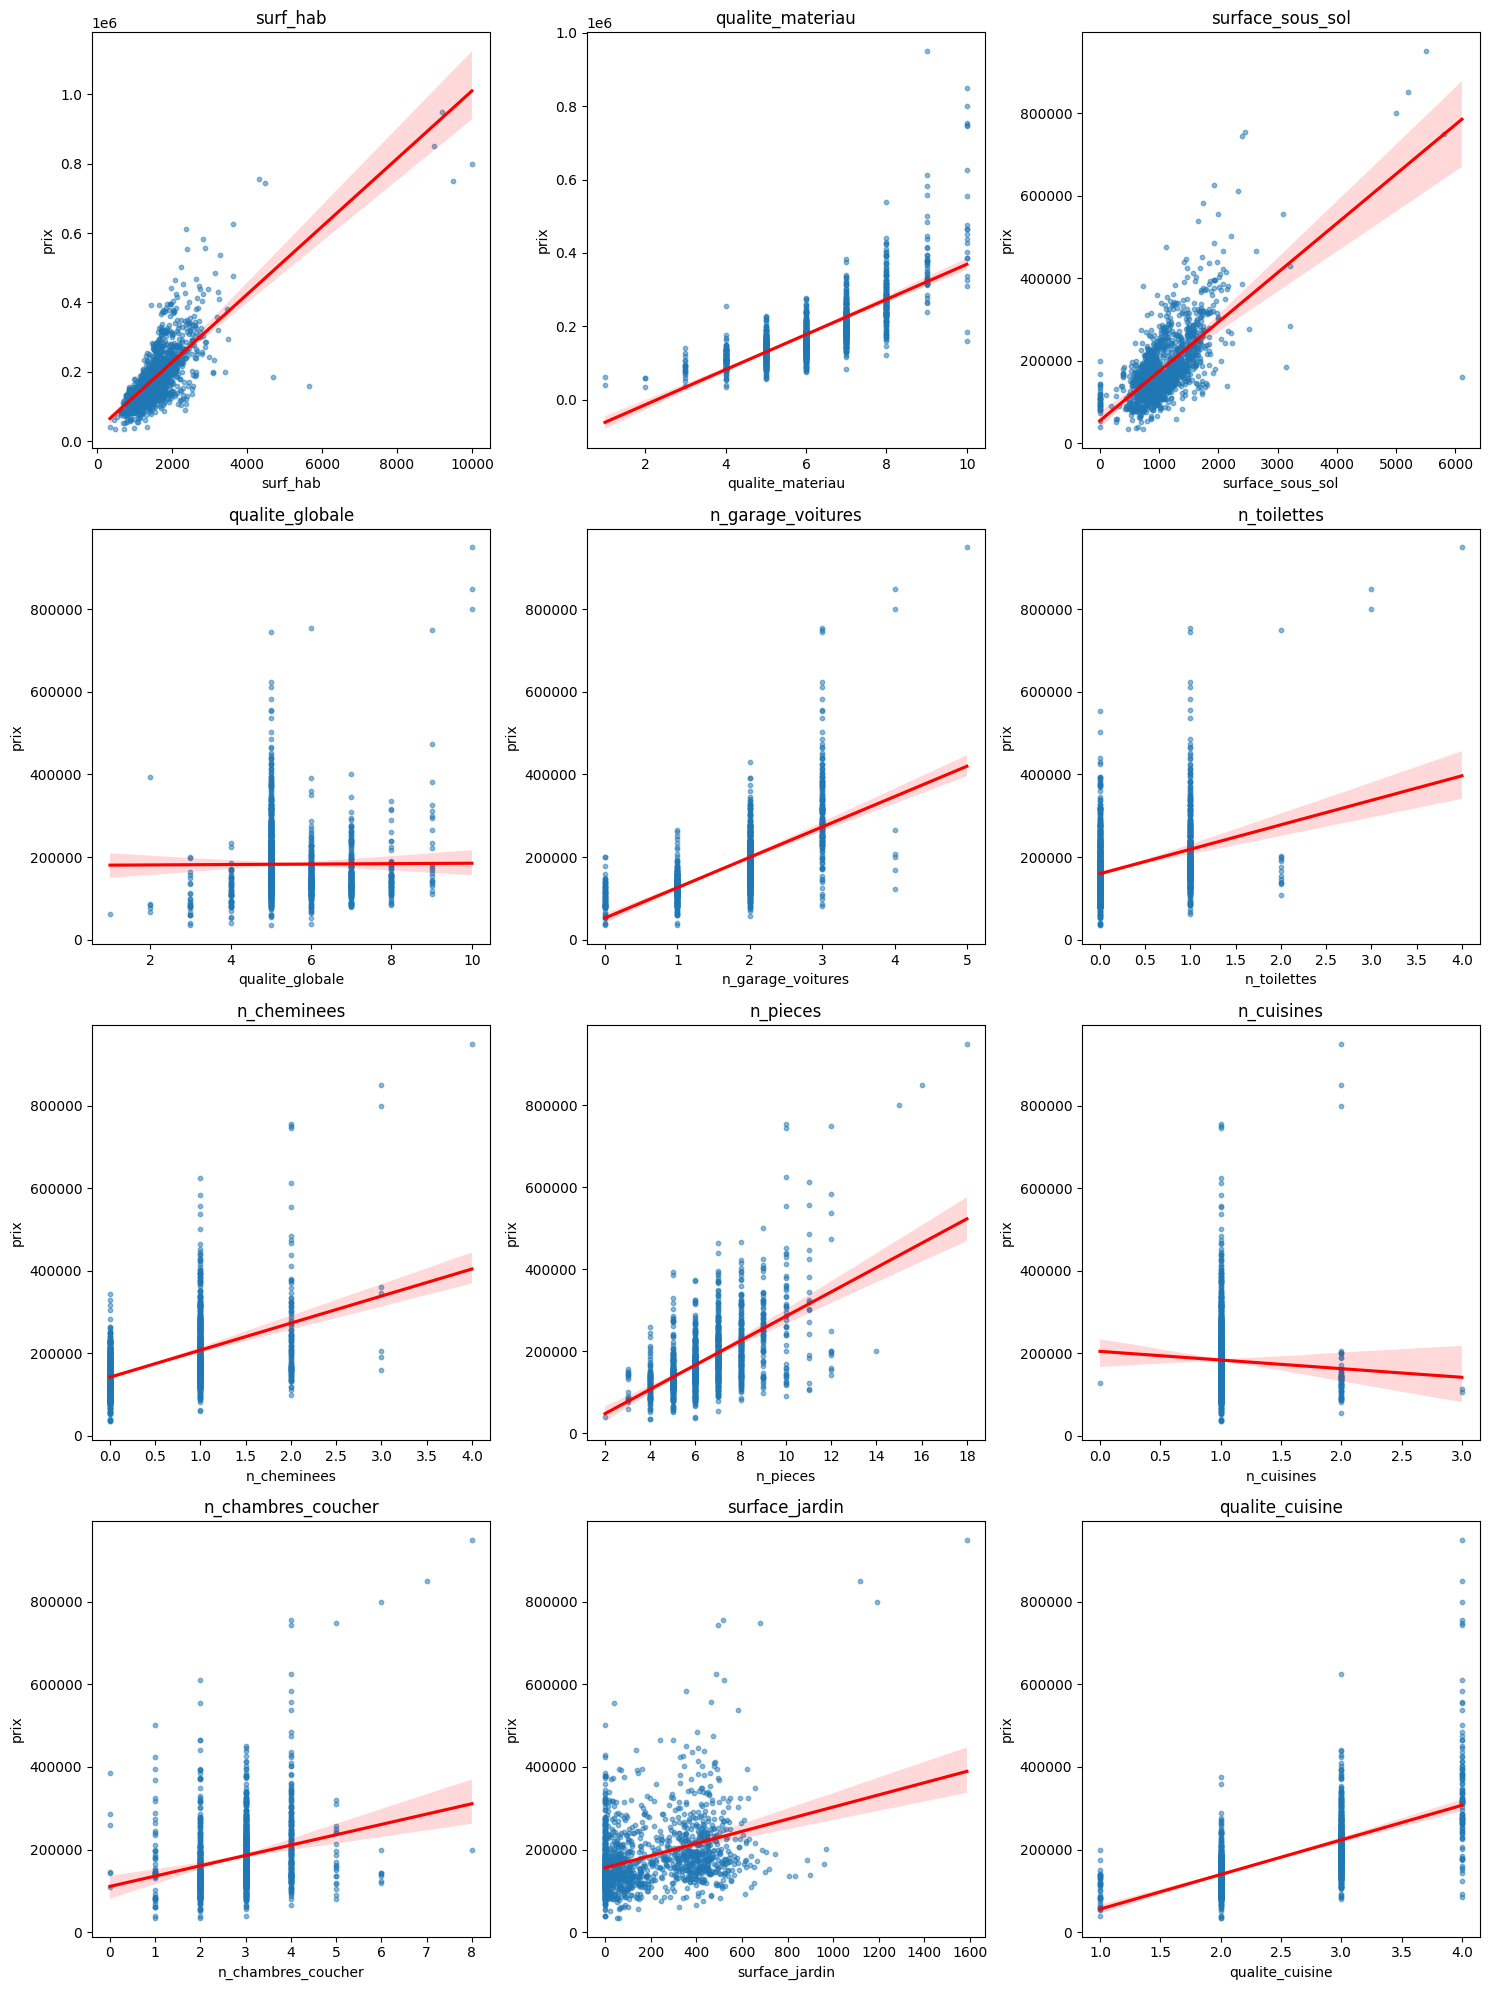

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["surf_hab","qualite_materiau","surface_sous_sol",
            "qualite_globale","n_garage_voitures","n_toilettes",
            "n_cheminees","n_pieces","n_cuisines","n_chambres_coucher",
            "surface_jardin", "qualite_cuisine"]

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, feature in enumerate(features):
    ax = axes[i // n_cols, i % n_cols]
    sns.regplot(data=df, x=feature, y="prix", ax=ax,
                scatter_kws={"s":10, "alpha":0.5}, line_kws={"color":"red"})
    ax.set_title(feature)

# Supprimer cases vides si besoin
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()


## Preprocessing

In [74]:
df = df[df["n_pieces"] <= 11]
df = df[df["n_cheminees"] <= 2]
df = df[df["n_chambres_coucher"] < 5]
df = df[df["prix"] < 500000]
df = df[df["n_garage_voitures"] <= 3]
df = df[df["surface_sous_sol"] < 2500]
df = df[df["n_toilettes"] <= 1]

# add a column which is surf_hab / n_pieces
df["surf_hab_per_piece"] = df["surf_hab"] / df["n_pieces"]

df.drop(columns=["annee_vente", "qualite_globale", "n_cuisines", "surface_jardin"], inplace=True)

## Training

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df.drop(columns=["prix"])
y_train = train_df["prix"]
X_test  = test_df.drop(columns=["prix"])
y_test  = test_df["prix"]

# --- preprocessors
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
numeric_cols     = X_train.select_dtypes(exclude=['object','category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# --- model & pipeline
elastic = ElasticNet(max_iter=10000, random_state=42)
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', elastic)])

# --- CV & grid
cv = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'model__alpha':    np.logspace(-3, 2, 10),
    'model__l1_ratio': np.linspace(0.05, 0.95, 10)
}

# multi-métriques; on refit sur la meilleure R²
gscv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring={'r2':'r2', 'neg_mae':'neg_mean_absolute_error', 'neg_rmse':'neg_root_mean_squared_error'},
    refit='r2',
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# --- fit grid
gscv.fit(X_train, y_train)

print("Best params:", gscv.best_params_)
print(f"Best CV R²: {gscv.best_score_:.3f}")

# --- évaluation test
best_model = gscv.best_estimator_
y_pred = best_model.predict(X_test)
rmse  = root_mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\nTest metrics (Elastic Net with GridSearchCV):")
print(f"  R²   : {r2:.3f}")
print(f"  RMSE : {rmse:.2f}")
print(f"  MAE  : {mae:.2f}")

# --- tableau des coefficients
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
coefs = best_model.named_steps['model'].coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs, 'abs_coef': np.abs(coefs)}) \
            .sort_values('abs_coef', ascending=False)
print("\nTop features:\n", coef_df.head(40))

Best params: {'model__alpha': np.float64(0.01291549665014884), 'model__l1_ratio': np.float64(0.65)}
Best CV R²: 0.833

Test metrics (Elastic Net with GridSearchCV):
  R²   : 0.853
  RMSE : 28281.41
  MAE  : 20734.36

Top features:
                                         feature          coef      abs_coef
10                                num__surf_hab  37864.154463  37864.154463
11                        num__qualite_materiau  19873.043427  19873.043427
12                        num__surface_sous_sol  14844.131252  14844.131252
18                         num__qualite_cuisine  12789.512321  12789.512321
16                                num__n_pieces -11633.319316  11633.319316
9           cat__type_batiment_milieu de rangée -10690.170368  10690.170368
19                      num__surf_hab_per_piece  -9670.509385   9670.509385
13                       num__n_garage_voitures   8416.035208   8416.035208
7               cat__type_batiment_individuelle   8232.354733   8232.354733
4       

In [76]:
df = pd.read_csv(maisons_raw_path)

df.drop(columns=["annee_vente", "qualite_globale", "n_cuisines", "surface_jardin"], inplace=True)
df["surf_hab_per_piece"] = df["surf_hab"] / df["n_pieces"]
qualite_map = {"mediocre": 1, "moyenne": 2, "bonne": 3, "excellente": 4}
df["qualite_cuisine"] = df["qualite_cuisine"].map(qualite_map)

X_full = df.drop(columns=["prix"])
y_full = df["prix"]

y_pred_full = best_model.predict(X_full)

rmse_full = root_mean_squared_error(y_full, y_pred_full)
mae_full  = mean_absolute_error(y_full, y_pred_full)
r2_full   = r2_score(y_full, y_pred_full)

print("\nEvaluation sur tout le dataset :")
print(f"  R²   : {r2_full:.3f}")
print(f"  RMSE : {rmse_full:.2f}")
print(f"  MAE  : {mae_full:.2f}")


Evaluation sur tout le dataset :
  R²   : 0.811
  RMSE : 37555.07
  MAE  : 22771.41


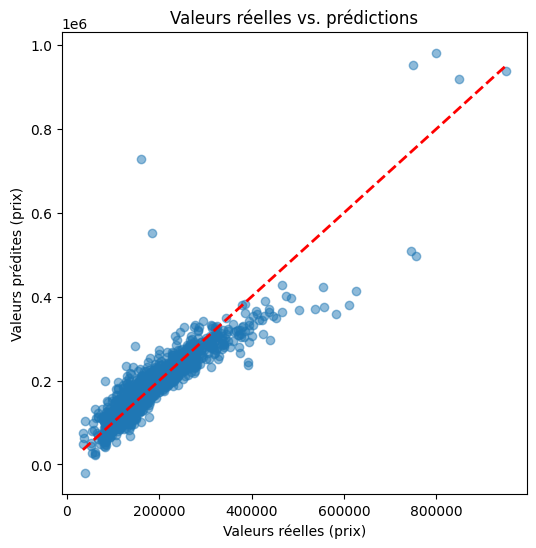

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_full, y_pred_full, alpha=0.5)
plt.plot([y_full.min(), y_full.max()],
         [y_full.min(), y_full.max()],
         'r--', lw=2)
plt.xlabel("Valeurs réelles (prix)")
plt.ylabel("Valeurs prédites (prix)")
plt.title("Valeurs réelles vs. prédictions")
plt.show()

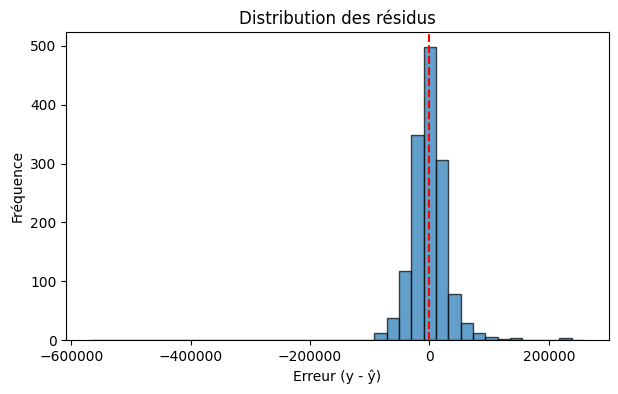

In [78]:
residuals = y_full - y_pred_full

plt.figure(figsize=(7,4))
plt.hist(residuals, bins=40, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Erreur (y - ŷ)")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.show()


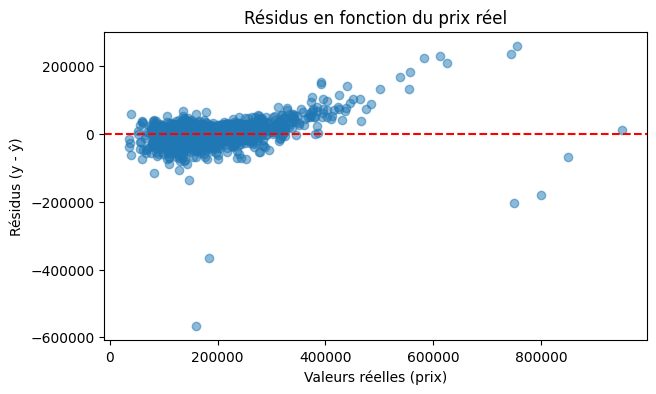

In [79]:
plt.figure(figsize=(7,4))
plt.scatter(y_full, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs réelles (prix)")
plt.ylabel("Résidus (y - ŷ)")
plt.title("Résidus en fonction du prix réel")
plt.show()
